# Predicting Long-Lived Bugs

## 1. Introduction 

This first experiment used a dataset with 7935 bug reports extracted from Eclipse Bugzilla Tracking System. The table below shows the evaluation performance metrics yielded.

In [65]:
# importing bug reports from Eclipse
import pandas as pd
reports = pd.read_csv('~/Workspace/issue-crawler/data/eclipse/csv/r2_bug_report_data.csv')
reports = reports.loc[(reports['DaysToResolve'] >= 0) & (reports['DaysToResolve'] <= 730)  , ]
reports.head(5)

,Bug_Id,Created,Component,Product,Summary,Description,Assignee,Reporter,Resolution,ResolutionCode,Status,StatusCode,Updated,Votes,QuantityOfComments,Resolved,DaysToResolve,Severity,SeverityCode
0,COMMUNITY-455431,2014-12-17,Servers,COMMUNITY,Need SSH access to build.eclipse.org for uwe.s...,I'm a committer on the tools.cdt.tcf project a...,webmaster,uwe.st,fixed,1,resolved,4,2014-12-17,0,3,2014-12-17,0,normal,2
1,JDT-31738,2003-02-12,UI,JDT,Weird behavior setting project libraries,Open the properties for a project then Java Bu...,martinae,bogofilter+eclipse.org,fixed,1,resolved,4,2003-02-18,0,4,2003-02-18,6,normal,2
2,ORION-389073,2012-09-07,Git,ORION,Pull gives me an auth fail error without promp...,With the latest changes in git credentials (to...,simon_kaegi,susan,fixed,1,resolved,4,2012-09-12,0,7,2012-09-12,5,major,4
3,JETTY-306226,2010-03-17,client,JETTY,HttpClient should allow changing to the keysto...,(Originally JETTY-1190 @ Codehaus JIRA)\n\nCur...,mgorovoy,mgorovoy,fixed,1,resolved,4,2010-10-13,0,3,2010-05-12,56,normal,2
4,WTP_SOURCE_EDITING-185183,2007-05-02,wst.xsd,WTP_SOURCE_EDITING,Update copyright headers for WSDL and XSD comp...,Update copyright headers for WSDL and XSD comp...,kchong,kchong,fixed,1,closed,6,2007-07-05,0,4,2007-05-02,0,normal,2


In [2]:
reports.describe(include="all")

,Bug_Id,Created,Component,Product,Summary,Description,Assignee,Reporter,Resolution,ResolutionCode,Status,StatusCode,Updated,Votes,QuantityOfComments,Resolved,DaysToResolve,Severity,SeverityCode
count,11246,11246,11246,11246,11243,11063,11246,11246,11246,11246.0,11246,11246.000000,11246,11246.000000,11246.000000,11246,11246.000000,11246,11246.000000
unique,11246,4183,631,188,11200,10903,1609,3082,1,NaN,2,NaN,3770,NaN,NaN,4064,NaN,6,NaN
top,DALI_JPA_TOOLS-396434,2001-10-10,UI,PLATFORM,Accessibility,,webmaster,david_williams,fixed,NaN,resolved,NaN,2016-05-05,NaN,NaN,2009-07-09,NaN,normal,NaN
freq,1,37,1302,1533,5,90,263,140,11246,NaN,7578,NaN,255,NaN,NaN,15,NaN,8876,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.652321,NaN,0.025698,5.706829,NaN,68.605460,NaN,2.398897
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.937655,NaN,0.351782,5.811217,NaN,131.934076,NaN,0.984836
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.000000,NaN,0.000000,1.000000,NaN,0.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.000000,NaN,0.000000,3.000000,NaN,1.000000,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.000000,NaN,0.000000,4.000000,NaN,9.000000,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,6.000000,NaN,0.000000,6.000000,NaN,63.000000,NaN,2.000000


In [3]:
reports[['DaysToResolve', 'QuantityOfComments', 'Votes', 'StatusCode', 'SeverityCode']].corr()

,DaysToResolve,QuantityOfComments,Votes,StatusCode,SeverityCode
DaysToResolve,1.000000,0.160134,0.074449,0.030915,-0.035139
QuantityOfComments,0.160134,1.000000,0.218668,0.039605,0.157905
Votes,0.074449,0.218668,1.000000,-0.021709,0.045361
StatusCode,0.030915,0.039605,-0.021709,1.000000,0.109946
SeverityCode,-0.035139,0.157905,0.045361,0.109946,1.000000


/Users/luiz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 174.25381085165824)

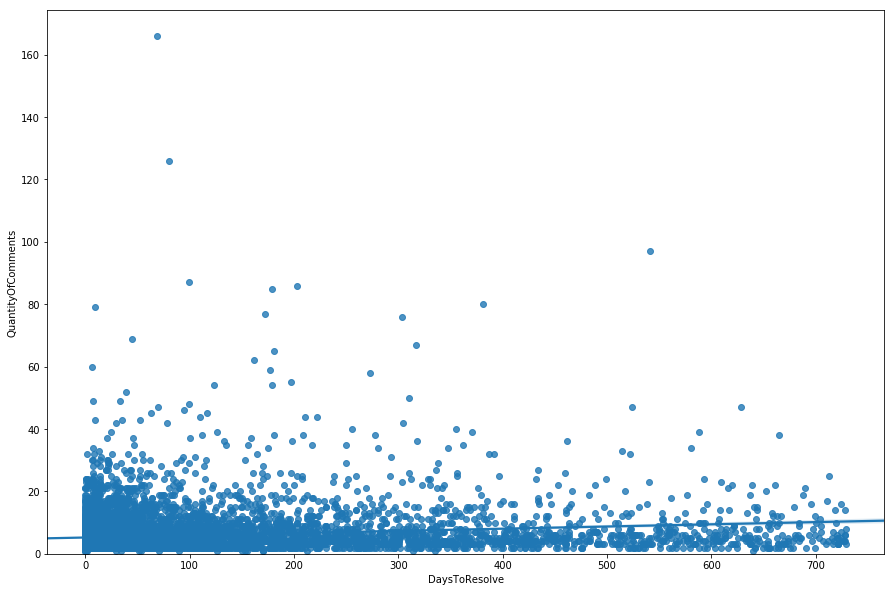

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,10))
#sns.regplot(data=reports.loc[(reports['DaysToResolve'] >= 64) & (reports['DaysToResolve'] <= 256),], y="DaysToResolve", x="QuantityOfComments")
sns.regplot(data=reports, x="DaysToResolve", y='QuantityOfComments')
plt.ylim(0,)

Text(0.5,0,'')

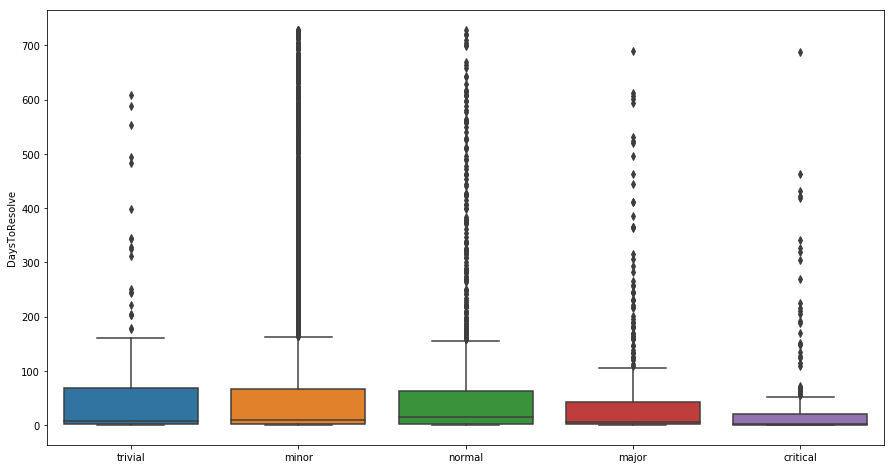

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,8))
g = sns.boxplot(data=reports, x="SeverityCode", y="DaysToResolve")
g.set(xticklabels=["trivial", "minor", "normal", "major", "critical", "blocker"])
plt.xlabel("")

In [16]:
number_of_reports   = reports['Bug_Id'].count()
number_of_reporters = reports['Reporter'].nunique()
print("%s reporters reported %s bugs." % (number_of_reporters, number_of_reports))

3082 reporters reported 11246 bugs.


In [54]:
top_10_reporters = reports.groupby('Reporter').Reporter.agg(['count'])
top_10_reporters = top_10_reporters.sort_values('count', ascending=False)[0:10]
top_10_reporters

,count
Reporter,
david_williams,140
john.arthorne,110
eclipse,109
wayne.beaton,96
markus.kell.r,95
pascal,84
daniel_megert,83
lchen,79
xwang,76


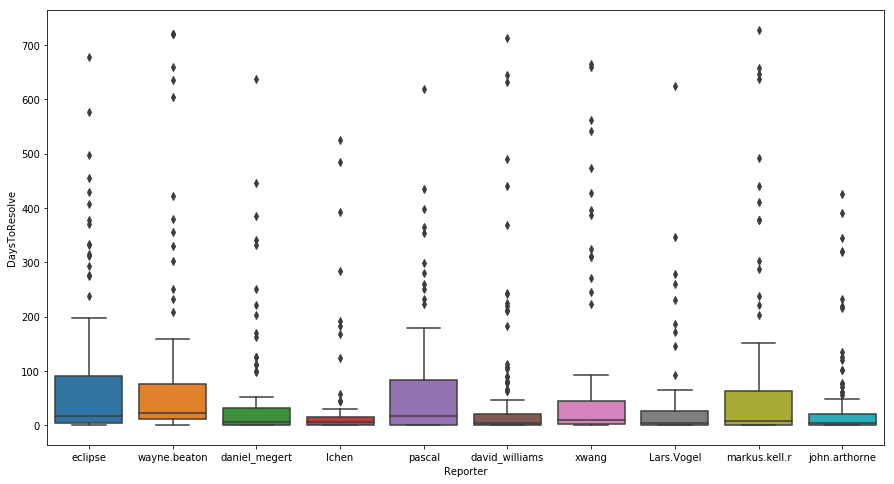

In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=reports[reports['Reporter'].isin(top_10_reporters.index)], x="Reporter", y="DaysToResolve")

In [60]:
top_10_assignee = reports.groupby('Assignee').Assignee.agg(['count'])
top_10_assignee = top_10_assignee.sort_values('count', ascending=False)[0:10]
top_10_assignee

,count
Assignee,
webmaster,263
rap-inbox,128
pde-ui-inbox,87
Silenio_Quarti,86
eclipse,85
emo,83
david_williams,80
john.arthorne,79
tmf.xtext-inbox,79


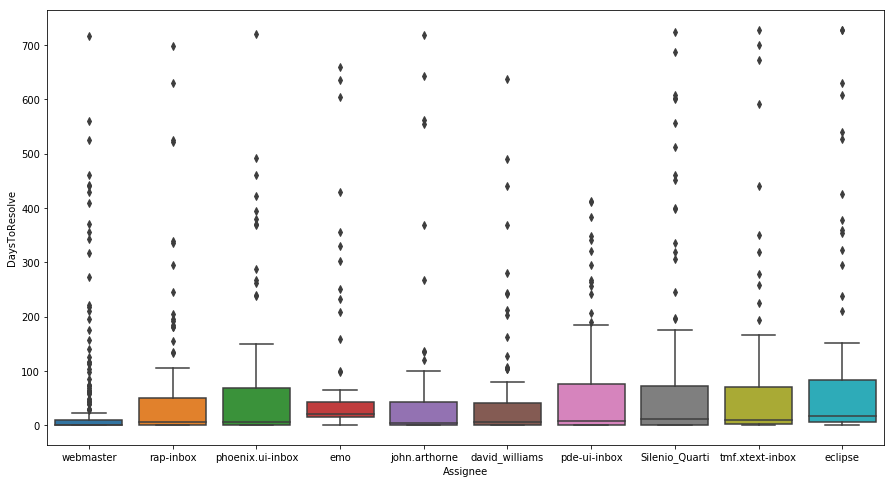

In [59]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=reports[reports['Assignee'].isin(top_10_assignee.index)], x="Assignee", y="DaysToResolve")

In [61]:
top_10_component = reports.groupby('Component').Component.agg(['count'])
top_10_component = top_10_component.sort_values('count', ascending=False)[0:10]
top_10_component

,count
Component,
UI,1302
Core,866
SWT,426
TPTP,251
Releng,220
General,216
cdt-core,186
Client,171
jst.j2ee,157


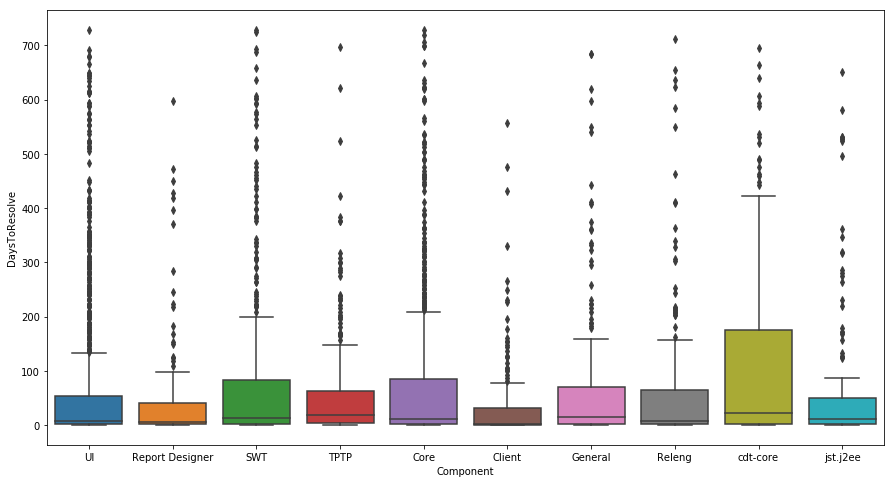

In [64]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=reports[reports['Component'].isin(top_10_component.index)], x="Component", y="DaysToResolve")

In [30]:
import pandas as pd
import numpy as np
results = pd.read_csv('~/Workspace/issue-crawler/rscripts/results/20181117131943-long_live_bug-evaluation.csv')

# filling missing data
results['Acc_1'] = results.Acc_1.fillna(0)
results['Balanced_Acc'] = results.Balanced_Acc.fillna(results.Acc_0 / 2)

# updating data 
results.loc[results['Model'] == 'knn', 'Model'] = 'KNN'
results.loc[results['Model'] == 'rf', 'Model']  = 'Random Forest'
results.loc[results['Model'] == 'svm', 'Model'] = 'SVM'
features = ['Description','Description_Summary']
results = results[results.Feature.isin(features)]
results

,Dataset,Model,Resampling,Threshold,Train_Size,Train_Qt_Class_0,Train_Qt_Class_1,Test_Size,Test_Qt_Class_0,Test_Qt_Class_1,...,Tp,Fp,Tn,Fn,Acc_0,Acc_1,Balanced_Acc,Precision,Recall,Fmeasure
0,Eclipse,KNN,bootstrap,4,5804,2511,3293,1933,836,1097,...,272,326,564,771,0.454849,0.422472,0.438661,0.454849,0.260786,0.331505
1,Eclipse,KNN,bootstrap,8,5803,3075,2728,1934,1025,909,...,572,466,453,443,0.551060,0.505580,0.528320,0.551060,0.563547,0.557233
2,Eclipse,KNN,bootstrap,12,5803,3318,2485,1934,1106,828,...,668,450,438,378,0.597496,0.536765,0.567130,0.597496,0.638623,0.617375
3,Eclipse,KNN,bootstrap,16,5803,3555,2248,1934,1185,749,...,818,469,367,280,0.635587,0.567233,0.601410,0.635587,0.744991,0.685954
4,Eclipse,KNN,bootstrap,20,5804,3702,2102,1933,1233,700,...,906,489,327,211,0.649462,0.607807,0.628635,0.649462,0.811101,0.721338
5,Eclipse,KNN,bootstrap,24,5804,3861,1943,1933,1286,647,...,1045,523,241,124,0.666454,0.660274,0.663364,0.666454,0.893926,0.763610
6,Eclipse,KNN,bootstrap,28,5804,3977,1827,1933,1325,608,...,1067,469,258,139,0.694661,0.649874,0.672268,0.694661,0.884743,0.778264
7,Eclipse,KNN,bootstrap,32,5804,4085,1719,1933,1361,572,...,1197,502,164,70,0.704532,0.700855,0.702693,0.704532,0.944751,0.807148
8,Eclipse,KNN,bootstrap,64,5803,4612,1191,1934,1537,397,...,1497,385,40,12,0.795430,0.769231,0.782331,0.795430,0.992048,0.882925
9,Eclipse,KNN,bootstrap,96,5803,4867,936,1934,1622,312,...,1592,297,30,15,0.842774,0.666667,0.754720,0.842774,0.990666,0.910755


## 2. Analysis of Results

In [31]:
# calculating ratio between classes.
results['Total_Ratio_Class_0'] = (results['Train_Qt_Class_0'] + results['Test_Qt_Class_0']) / (results['Train_Size']+results['Test_Size']) 
results['Total_Ratio_Class_1'] = (results['Train_Qt_Class_1'] + results['Test_Qt_Class_1']) / (results['Train_Size']+results['Test_Size']) 
results['Train_Ratio_Class_0'] = (results['Train_Qt_Class_0']) / (results['Train_Size']) 
results['Train_Ratio_Class_1'] = (results['Train_Qt_Class_1']) / (results['Train_Size']) 
results['Test_Ratio_Class_0']  = (results['Test_Qt_Class_0'])  / (results['Test_Size']) 
results['Test_Ratio_Class_1']  = (results['Test_Qt_Class_1'])  / (results['Test_Size']) 

results.head(10)

,Dataset,Model,Resampling,Threshold,Train_Size,Train_Qt_Class_0,Train_Qt_Class_1,Test_Size,Test_Qt_Class_0,Test_Qt_Class_1,...,Balanced_Acc,Precision,Recall,Fmeasure,Total_Ratio_Class_0,Total_Ratio_Class_1,Train_Ratio_Class_0,Train_Ratio_Class_1,Test_Ratio_Class_0,Test_Ratio_Class_1
0,Eclipse,KNN,bootstrap,4,5804,2511,3293,1933,836,1097,...,0.438661,0.454849,0.260786,0.331505,0.432597,0.567403,0.432633,0.567367,0.432488,0.567512
1,Eclipse,KNN,bootstrap,8,5803,3075,2728,1934,1025,909,...,0.528320,0.551060,0.563547,0.557233,0.529921,0.470079,0.529898,0.470102,0.529990,0.470010
2,Eclipse,KNN,bootstrap,12,5803,3318,2485,1934,1106,828,...,0.567130,0.597496,0.638623,0.617375,0.571798,0.428202,0.571773,0.428227,0.571872,0.428128
3,Eclipse,KNN,bootstrap,16,5803,3555,2248,1934,1185,749,...,0.601410,0.635587,0.744991,0.685954,0.612641,0.387359,0.612614,0.387386,0.612720,0.387280
4,Eclipse,KNN,bootstrap,20,5804,3702,2102,1933,1233,700,...,0.628635,0.649462,0.811101,0.721338,0.637844,0.362156,0.637836,0.362164,0.637869,0.362131
5,Eclipse,KNN,bootstrap,24,5804,3861,1943,1933,1286,647,...,0.663364,0.666454,0.893926,0.763610,0.665245,0.334755,0.665231,0.334769,0.665287,0.334713
6,Eclipse,KNN,bootstrap,28,5804,3977,1827,1933,1325,608,...,0.672268,0.694661,0.884743,0.778264,0.685279,0.314721,0.685217,0.314783,0.685463,0.314537
7,Eclipse,KNN,bootstrap,32,5804,4085,1719,1933,1361,572,...,0.702693,0.704532,0.944751,0.807148,0.703890,0.296110,0.703825,0.296175,0.704087,0.295913
8,Eclipse,KNN,bootstrap,64,5803,4612,1191,1934,1537,397,...,0.782331,0.795430,0.992048,0.882925,0.794752,0.205248,0.794761,0.205239,0.794726,0.205274
9,Eclipse,KNN,bootstrap,96,5803,4867,936,1934,1622,312,...,0.754720,0.842774,0.990666,0.910755,0.838697,0.161303,0.838704,0.161296,0.838676,0.161324


In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
   
def plot_line_by_models(data, title, feature, value, ylabel):
    plt.style.use('default')
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8), sharex=True)
    all_results = data[data['Feature'] == feature]
    
    bs_results  = all_results[all_results['Resampling'] == 'bootstrap']
    bs_results  = bs_results.pivot_table(index=['Threshold'], columns='Model', values=value)
    
    cv_results  = all_results[all_results['Resampling'] == 'cv52']
    cv_results  = cv_results.pivot_table(index=['Threshold'], columns='Model', values=value)
    
    threshold_range_1 = range(4, 36, 4)
    threshold_range_2 = range(64, 534, 32)
    threshold_range   = list(threshold_range_1) + list(threshold_range_2)
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)

    # Plotting for bootstrap resampling
    ax = bs_results.plot(style=['r*-','bo-','y^-']
                        , title = 'resampling: booststrap'
                        #, xticks=threshold_range
                        , yticks=np.arange(0, 1, step=0.1)
                        , grid=True
                        , ax = axes[0]
                        , figsize=(20,8))

    ax.set_ylabel(ylabel)
    ax.set_ylim(0,1.0)
    #ax.set_xticklabels(threshold_range, fontsize=9)
     
    # Plotting for repeated cv 5 x 2 resampling    
    ax = cv_results.plot(style=['r*-','bo-','y^-']
                        , title = 'resampling: cv 5x2'
                        #, xticks=[4, 8, 16, 32, 64, 128, 256, 512]
                        , yticks=np.arange(0, 1, step=0.1)
                        , grid=True
                        , ax = axes[1]
                        , figsize=(20,8))
    
    ax.set_ylabel(ylabel)
    ax.set_ylim(0,1.0)
    
    #ax.set_xticklabels(threshold_range, fontsize=9)
    
    return fig, ax

## Analysis Using Description Feature

(<Figure size 2000x800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1cf118d0>)

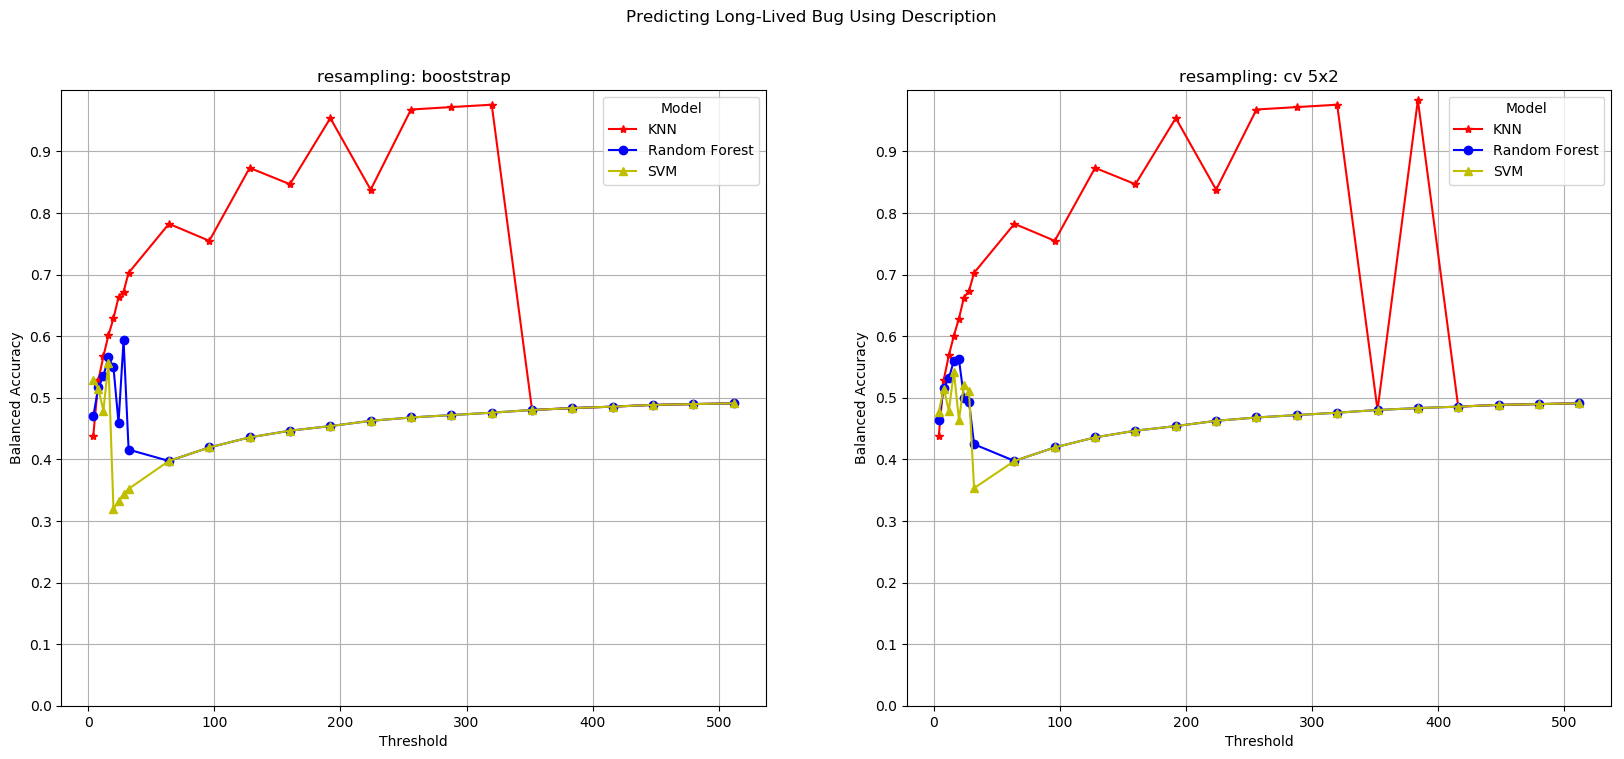

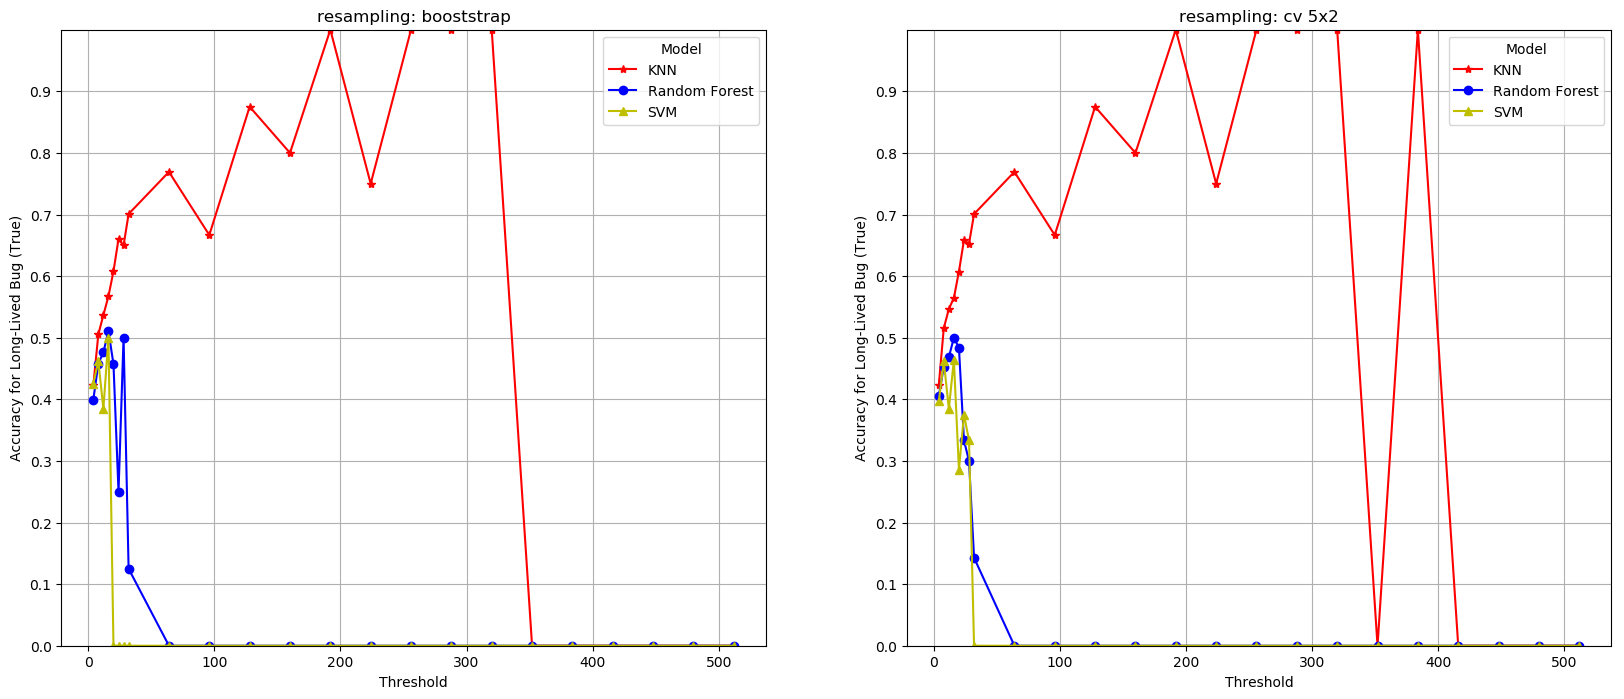

In [33]:
plot_line_by_models(results, 'Predicting Long-Lived Bug Using Description', 'Description','Balanced_Acc', 'Balanced Accuracy')
plot_line_by_models(results, '', 'Description',  'Acc_1', 'Accuracy for Long-Lived Bug (True)')

Taking into account a reasonable threshold of up to 32 days, the **knn model** yielded the best accuracy value (**70.2%**) for both bootstrap and cross-validation.

Taking into account a reasonable threshold of up to **32 days**, the **random forest** model yielded the best accuracy values, **76.2%** for both bootstrap and **74.2%** for cross-validation resampling methods.

## Analysis Using Description and Summary Features

(<Figure size 2000x800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f3eceb8>)

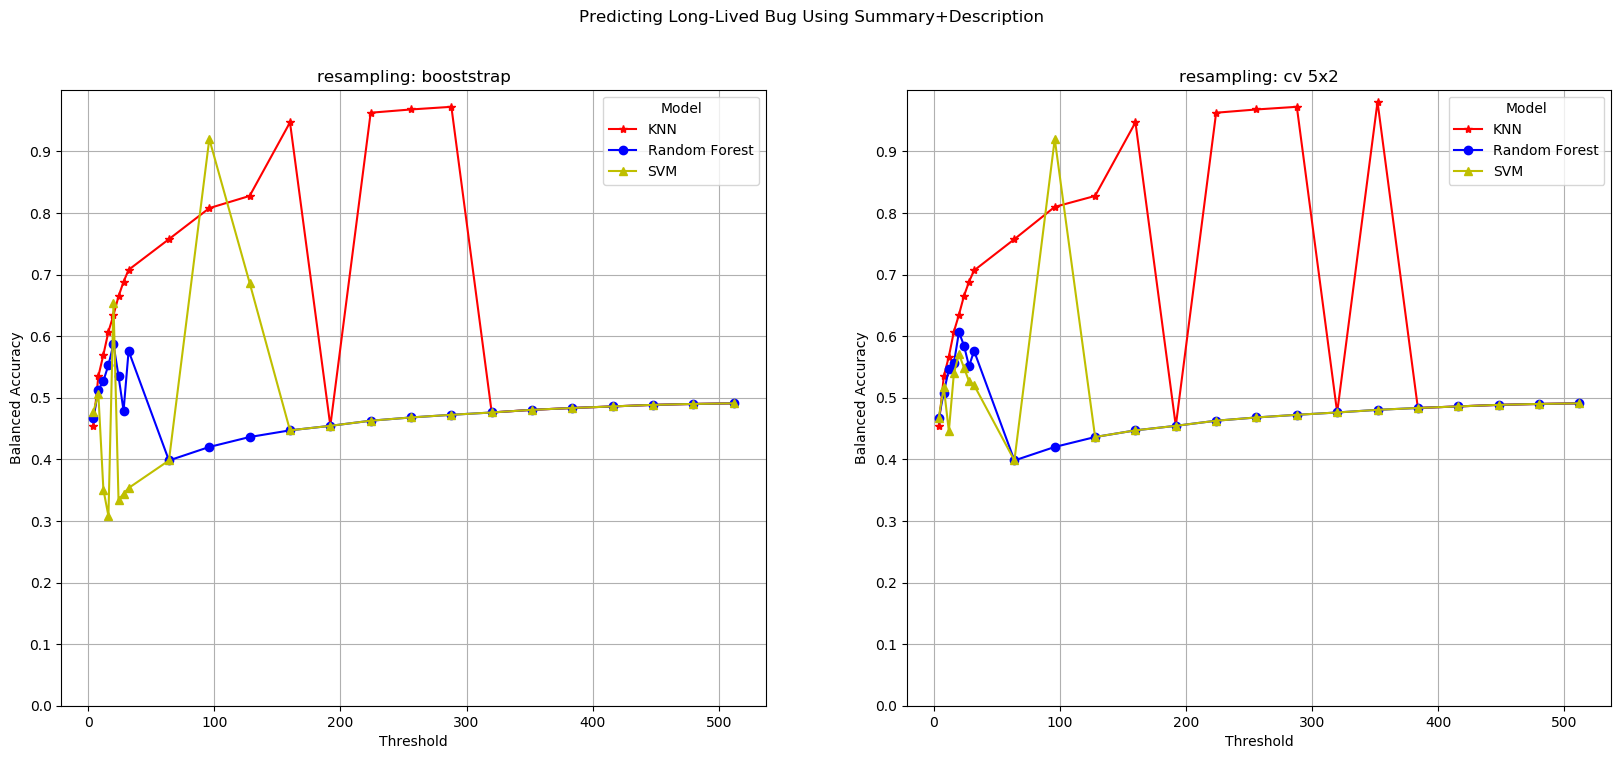

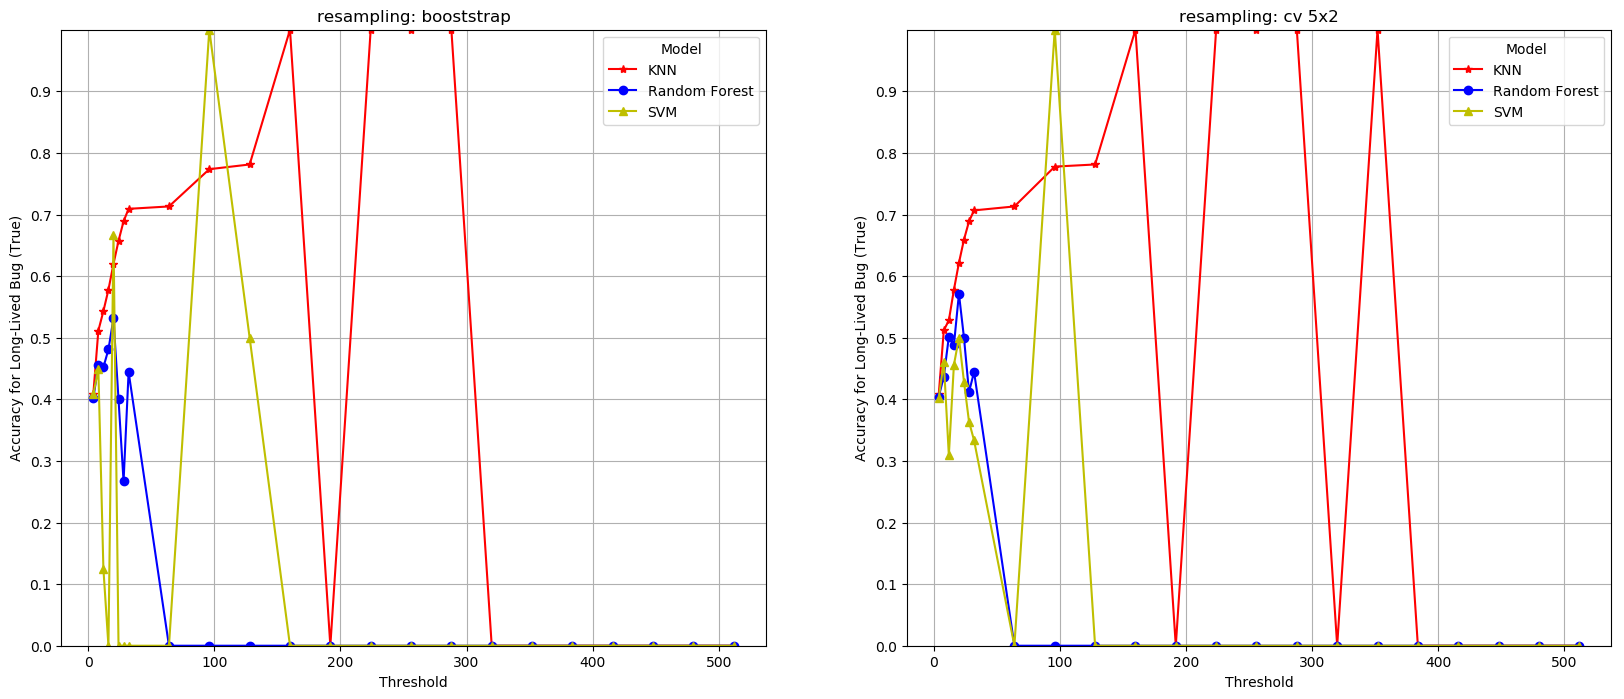

In [34]:
plot_line_by_models(results, 'Predicting Long-Lived Bug Using Summary+Description', 'Description_Summary', 'Balanced_Acc', 'Balanced Accuracy')
plot_line_by_models(results, '', 'Description_Summary', 'Acc_1', 'Accuracy for Long-Lived Bug (True)')

## Analysis Using Summary Feature

In [35]:
#plot_line_by_models(results, 'Predicting Long-Lived Bug Using Summary', 'Summary', 'Balanced_Acc', 'Balanced Accuracy')
#plot_line_by_models(results, '', 'Summary', 'Acc_1', 'Accuracy for Long-Lived Bug (True)')

Taking into account a reasonable threshold of up to **32 days**, the **knn** model yielded the best accuracy values, **70.7**% for bootstrap and **70.6**% for cross-validation resampling methods.

## Analysis of Class Ratio

(<Figure size 2000x800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f519860>)

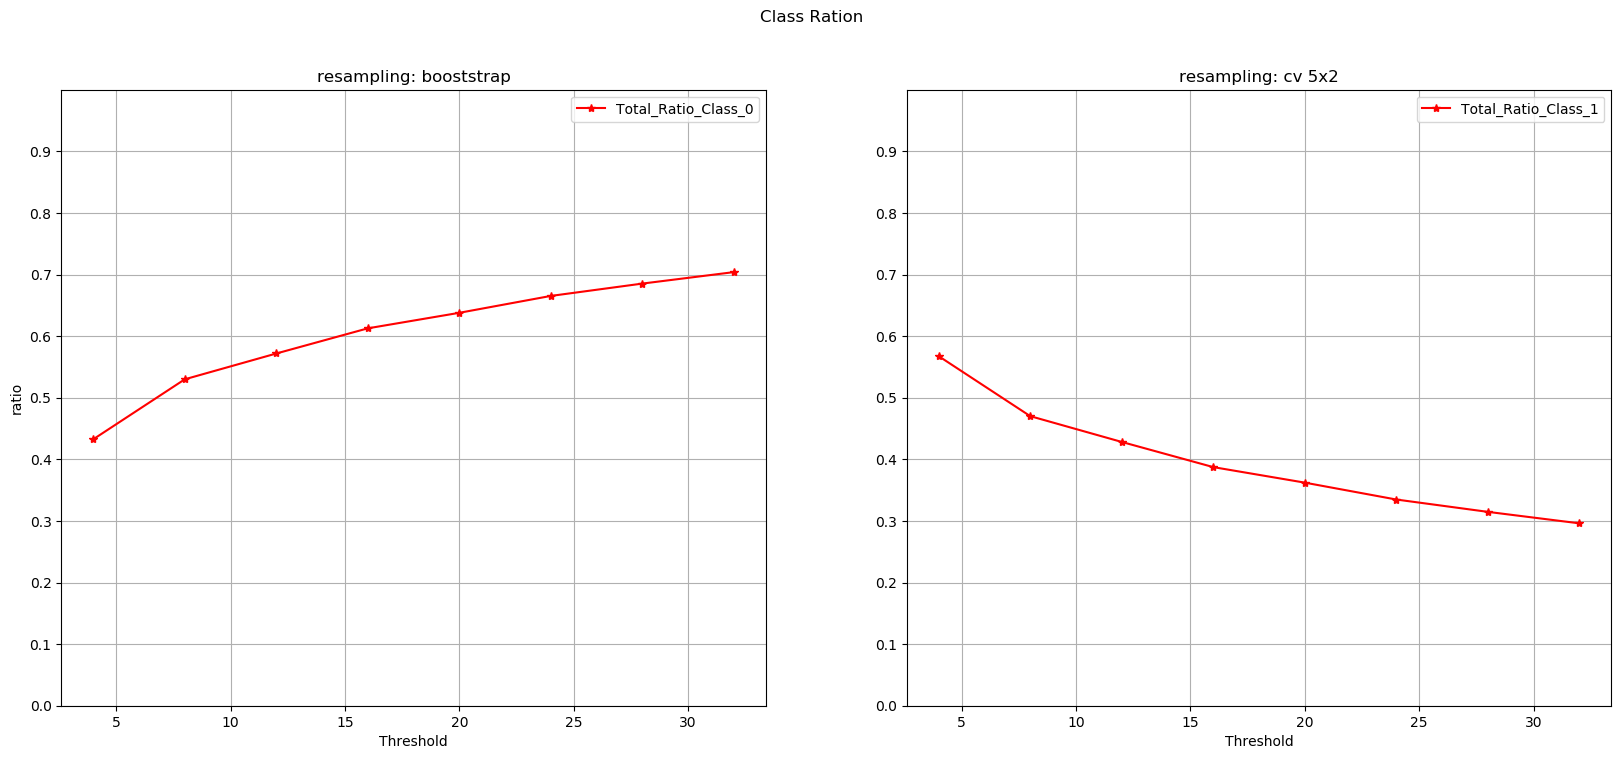

In [36]:
def plot_line_ratios(data):
    plt.style.use('default')

    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8), sharex=True)
    ratios = results.iloc[0:8, ]
    ratios = ratios[['Threshold','Total_Ratio_Class_0','Total_Ratio_Class_1']]
   
    ratios_class_0  = ratios[['Threshold','Total_Ratio_Class_0']]
    ratios_class_1  = ratios[['Threshold','Total_Ratio_Class_1']]
    
    ratios_class_0.set_index('Threshold', inplace=True, drop=True)
    ratios_class_1.set_index('Threshold', inplace=True, drop=True)
  
    threshold_range_1 = range(4, 36, 4)
    threshold_range_2 = range(64, 534, 32)
    threshold_range   = list(threshold_range_1) + list(threshold_range_2)
    
    fig.suptitle('Class Ration')

    # Plotting for bootstrap resampling
    ax = ratios_class_0.plot(style=['r*-','bo-','y^-']
                        , title = 'resampling: booststrap'
                        #, xticks=[4, 8, 16, 32, 64, 128, 256, 512]
                        , yticks=np.arange(0, 1, step=0.1)
                        , grid=True
                        , ax = axes[0]
                        , figsize=(20,8))

    ax.set_ylabel('ratio')
    ax.set_ylim(0,1.0)
    #ax.set_xticklabels(threshold_range, fontsize=9)
     
    # Plotting for repeated cv 5 x 2 resampling    
    ax = ratios_class_1.plot(style=['r*-','bo-','y^-']
                        , title = 'resampling: cv 5x2'
                        #, xticks=[4, 8, 16, 32, 64, 128, 256, 512]
                        , yticks=np.arange(0, 1, step=0.1)
                        , grid=True
                        , ax = axes[1]
                        , figsize=(20,8))
    
    ax.set_ylabel('')
    ax.set_ylim(0,1.0)
    #ax.set_xticklabels(threshold_range, fontsize=9)
    
    return fig, ax

plot_line_ratios(results)
